# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as skm
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1205459
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255

Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [45 45 48 54 58 51 40 46 48 65]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.Blues,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


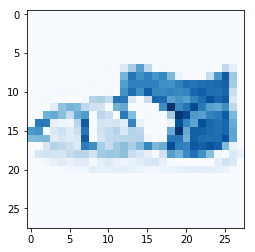

LABEL: 5
INPUT:


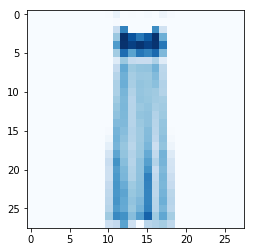

LABEL: 3
INPUT:


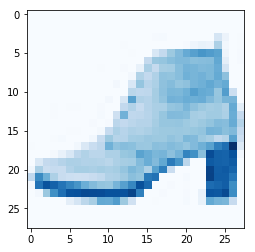

LABEL: 9
INPUT:


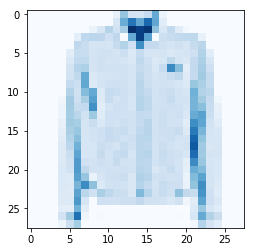

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)
plot_input(X_test,y_test,10000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 5-fold cross-validation. Let's start with a Linear kernel:

In [16]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#grid of parameters for your SVC
param_grid = [
  {'C': [0.001, 0.01, 0.1, 1., 10, 100, 1000], 'gamma':[0.01, 0.001], 'kernel': ['linear']},
  {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
  {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['poly'], 'degree':[2,3]},
 ]

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#run linear SVM

regression = GridSearchCV(SVC('linear'), parameters, return_train_score=True)

regression.fit(X_train, y_train)

print('\nRESULTS FOR LINEAR KERNEL')

print("\nBest parameters set found:", "\n")
print(regression.best_params_)
#print(regression.best_params_)

print("\nScore with best parameters:", "\n")
print(regression.best_score_)

print("\nAll scores on the grid:", "\n")
print(regression.cv_results_['mean_train_score'])


RESULTS FOR LINEAR KERNEL

Best parameters set found: 

{'C': 100}

Score with best parameters: 

0.816

All scores on the grid: 

[0.12999839 0.12999839 0.14097952 0.73497713 0.92000792 1.        ]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [17]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel

reg_pol_2 = GridSearchCV(SVC(kernel='poly', degree=2), parameters, return_train_score=True)
reg_pol_2.fit(X_train, y_train)

print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("\nBest parameters set found:\n")
print(reg_pol_2.best_params_)

print("\nScore with best parameters:\n")
print(reg_pol_2.best_score_)

print("\nAll scores on the grid:\n")
print(reg_pol_2.cv_results_['mean_train_score'])


RESULTS FOR POLY DEGREE=2 KERNEL


Best parameters set found:

{'C': 0.01, 'gamma': 1.0}

Score with best parameters:

0.802

All scores on the grid:

[0.23903837 0.89300721 1.         0.66500723 0.99699088 1.
 0.89300721 1.         1.        ]


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [18]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of higher degree kernel
degree = 3

reg_pol_3 = GridSearchCV(SVC(kernel='poly', degree=3), parameters, return_train_score=True)
reg_pol_3.fit(X_train, y_train)

print('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("\nBest parameters set found:\n")
print(reg_pol_3.best_params_)

print("\nScore with best parameters:\n")
print(reg_pol_3.best_score_)

print("\nAll scores on the grid:\n")
print(reg_pol_3.cv_results_['mean_train_score'])

RESULTS FOR POLY DEGREE= 3  KERNEL

Best parameters set found:

{'C': 0.01, 'gamma': 1.0}

Score with best parameters:

0.782

All scores on the grid:

[0.35700037 0.97997341 1.         0.67102547 1.         1.
 0.90802867 1.         1.        ]


## TO DO4 
What do you observe when fitting a higher degree polynomial on this dataset?

I notice that the score become smaller while the polynomial degree increases, so maybe the better models could be low degree polynomial ones, or non-polynomial ones.

## TO DO 5
Pick a model for the Radial Basis Function kernel:

In [19]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.01,0.1]}

#run SVM with rbf kernel

reg_rbf = GridSearchCV(SVC(), parameters, return_train_score=True)
reg_rbf.fit(X_train, y_train)

print('RESULTS FOR rbf KERNEL\n')

print("\nBest parameters set found:\n")
print(reg_rbf.best_params_)

print("\nScore with best parameters:\n")
print(reg_rbf.best_score_)

print("\nAll scores on the grid:")
print(reg_rbf.cv_results_['mean_train_score'])

RESULTS FOR rbf KERNEL


Best parameters set found:

{'C': 100, 'gamma': 0.001}

Score with best parameters:

0.816

All scores on the grid:
[0.12999839 0.49403927 0.49403927 0.12999839 0.70796749 0.90001144
 0.90001144 1.         0.90899358 1.         1.         1.
 1.         1.         1.         1.        ]


## TO DO 6
Report here the best SVM kernel and parameters

In [20]:
#get training and test error for the best SVM model from CV

best_SVM = GridSearchCV(SVC(), param_grid, cv=5)
#print(best_SVM)

# The best solution (that with best score) is: kernel:'rbf'
#best_SVM = SVC(kernel='rbf', C=100.0, gamma=0.001)

best_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['linear']}, {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}, {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['poly'], 'degree': [2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best fitter: ", best_SVM.best_params_)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best fitter:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM training error: 0.000000
Best SVM test error: 0.209076


## More data
Now let's do the same but using more data points for training.

### TO DO 7
Choose a new number of data points.

In [23]:
X = X[permutation]
y = y[permutation]

m_training = 30000 # TODO number of data points, adjust depending on the capabilities of your PC

#best_SVM = SVC(kernel='rbf', C=100.0, gamma=0.001)

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [2970 3030 2994 3020 2969 2968 2992 3037 3061 2959]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

Best fitter:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel='rbf', C=100.0, gamma=0.01)

best_SVM.fit(X_train, y_train)

In [24]:
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

#print ("Best fitter: ", best_SVM.best_params_)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000200
Best SVM test error: 0.111800


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

In [25]:
from sklearn import linear_model

In [26]:
sci_regression = linear_model.LogisticRegression()

sci_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
training_error = 1. - sci_regression.score(X_train,y_train)
test_error = 1. - sci_regression.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.117967
Best logistic regression test error: 0.152500


## TO DO 9
Compare and discuss:
- the results from SVM with m=500 and with m=30000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

# Answer#
**m = 30000**

Best fitter:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} (Used that found for m=500)

Best SVM training error: 0.000200

Best SVM test error: 0.111800


**m = 500**

Best fitter:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Best SVM training error: 0.000000

Best SVM test error: 0.209076


**Logistic**

Best logistic regression training error: 0.117967

Best logistic regression test error: 0.152500


One can notice that the results for a greater m are better and try to generalize more: indeed there is a training error that there was not before. In other words, the fit with m larger help avoiding overfitting. The logistic regression has "average" results since try not to overfit (the training error is quite large) but it also has a quite small test error, which implies that its fit is usually better than the SVD run on m=500

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [33]:
LR_prediction = sci_regression.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

In [34]:
print(LR_prediction.shape)
print(SVM_prediction.shape)

(30000,)
(30000,)


1 False 6
2 False 1
3 False 0
4 False 4
5 False 1
6 False 1
7 False 9
8 False 5
9 False 0
10 False 4
11 False 4
12 False 9
13 False 0
14 False 1
15 False 5
16 False 1
17 False 8
18 False 8
19 True 2
INPUT:


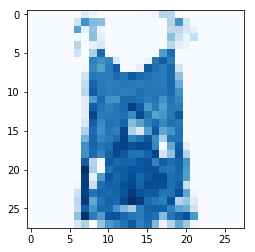

LABEL: 0
SVM prediction:  0
Logistic prediction:  8


In [36]:
i = 0
found = False
while found==False:
    if (LR_prediction[i] != y_test[i] and (SVM_prediction[i] == y_test[i])):
        found = True
    i += 1
    print(i, found, LR_prediction[i], )

plot_input(X_test,y_test,i-1)
print("SVM prediction: ", SVM_prediction[i-1])
print("Logistic prediction: ", LR_prediction[i-1])

### ADD CODE TO SEARCH AND VISUALIZE

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by dividing each row for the number of samples in each class in order to measure the accuracy on each single class.


In [49]:
np.set_printoptions(precision=4, suppress=True,floatmode='fixed') # for better aligned printing of confusion matrix

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)

print("\n Confusion matrix SVM  \n \n", confusion_SVM)

### ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)

print("\n Confusion matrix LR  \n \n", confusion_LR)

### ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

confusion_LR = confusion_LR/ np.sum([confusion_LR[j].sum() for j in range(len(confusion_LR))])
confusion_SVM = confusion_SVM/ np.sum([confusion_SVM[j].sum() for j in range(len(confusion_SVM))])

print("\nNormalized confusion matrix for SVM  \n \n", confusion_SVM)

print("\nNormalized confusion matrix for LR  \n \n", confusion_LR)

Labels and frequencies in test set:  [3030 2970 3006 2980 3031 3032 3008 2963 2939 3041]

 Confusion matrix SVM  
 
 [[2554    2   50   74    4    1  313    0   31    1]
 [   7 2898    8   44    4    0    8    0    1    0]
 [  48    2 2516   19  220    2  191    0    8    0]
 [  95   23   41 2655   91    0   66    0    9    0]
 [   8    5  258   98 2484    0  172    0    6    0]
 [   0    0    0    0    1 2912    1   79   10   29]
 [ 379    1  261   77  186    0 2075    0   29    0]
 [   0    0    0    0    0   75    0 2784    9   95]
 [  15    1   16    6    8    8   23    3 2859    0]
 [   0    0    0    1    0   28    1   99    3 2909]]

 Confusion matrix LR  
 
 [[2472    8   59  161   10    5  258    0   56    1]
 [  12 2841   13   79    7    0   12    2    4    0]
 [  51    6 2283   17  398    1  227    0   22    1]
 [ 120   24   43 2594  110    4   78    0    7    0]
 [  13    7  255   93 2375    0  260    1   27    0]
 [   3    0    3    4    1 2782    5  142   30   62]
 [ 462 

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Generally, one can notice that in this case the SVM paradigm classifies better than the LR one.

Another thing that one can notice are the different confusions depednting on the kind of clothes: indeed the feature 2, 4 and 6 are the most missclassified and are those who are more "confused" with one another. This beacuse they are kind of clothes that are in fact very similar each other, leading to a missclassification also for the algorythm.

Take also for example the trousers and the ankle boot: they are classes which can "hardly" be missclassified, so their classification (also for the algorythm) is "easier" and leads generally to correct labelling.